<a href="https://colab.research.google.com/github/AmeliaGizzela/dicoding.data.bikesharing/blob/main/Proyek_Analisis_Data_(Amelia_Gizzela).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Amelia Gizzela Sheehan Auni
- **Email:** a007xbf052@devacademy.id
- **ID Dicoding:** a007xbf052

## Menentukan Pertanyaan Bisnis


- Kapan waktu puncak penyewaan sepeda?
- Bagaimana cuaca memengaruhi jumlah penyewaan sepeda?
- Bagaimana musim memengaruhi jumlah penyewaan sepeda?
- Bagaimana kita bisa mengelompokkan pola penyewaan berdasarkan RFM Analysis?
- Bagaimana cara mengelompokkan hari berdasarkan jumlah penyewaan?


## Import Semua Packages/Library yang Digunakan

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
day_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding1/day.csv")
hour_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding1/hour.csv")

## Data Wrangling

### Gathering Data

In [5]:
# Display basic info and summary statistics for both datasets
print(day_df.info())
print(hour_df.info())

# Display first few rows of each dataset
print(day_df.head())
print(hour_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns

**Insight:**
- Dataset "day.csv" memiliki 731 data harian, sementara "hour.csv" memiliki 17.379 data per jam.
- Kolom penting: `cnt` (jumlah total penyewaan), `temp`, `season`, `weathersit`, dan `hr` (hanya di "hour.csv").

### Assessing Data

In [6]:
# Cek data duplikat
duplicate_day = day_df.duplicated().sum()
duplicate_hour = hour_df.duplicated().sum()

# Cek missing values
missing_day = day_df.isnull().sum()
missing_hour = hour_df.isnull().sum()

# Cek statistik dasar untuk melihat kemungkinan outlier
desc_day = day_df.describe()
desc_hour = hour_df.describe()

print(f"Jumlah duplikat di day.csv: {duplicate_day}")
print(f"Jumlah duplikat di hour.csv: {duplicate_hour}")
print(f"Missing values di day.csv:\n{missing_day}")
print(f"Missing values di hour.csv:\n{missing_hour}")


Jumlah duplikat di day.csv: 0
Jumlah duplikat di hour.csv: 0
Missing values di day.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values di hour.csv:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


**Insight:**
- Tidak ada data duplikat di kedua dataset (bersih).
- Tidak ada nilai yang hilang dalam kedua dataset (bersih).


### Cleaning Data

Pada tahap ini kita skip soalnya datanya udah oke

## Exploratory Data Analysis (EDA), Visualisasi, dan Explanatory Analisis

### **Pertanyaan 1** Statistik Dasar Penyewaan Sepeda

            casual   registered          cnt
count   731.000000   731.000000   731.000000
mean    848.176471  3656.172367  4504.348837
std     686.622488  1560.256377  1937.211452
min       2.000000    20.000000    22.000000
25%     315.500000  2497.000000  3152.000000
50%     713.000000  3662.000000  4548.000000
75%    1096.000000  4776.500000  5956.000000
max    3410.000000  6946.000000  8714.000000


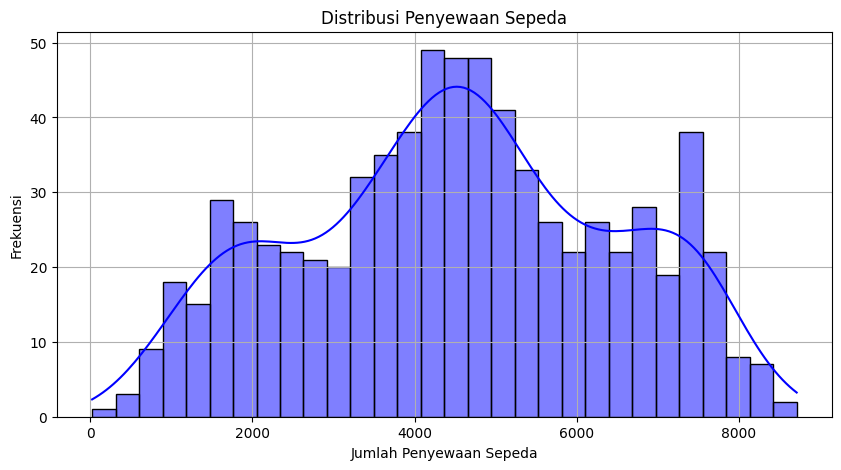

In [7]:
# Statistik dasar penyewaan sepeda harian
print(day_df[['casual', 'registered', 'cnt']].describe())

"""### 2️⃣ Distribusi Jumlah Penyewaan Sepeda
"""

# Visualisasi distribusi jumlah penyewaan
plt.figure(figsize=(10, 5))
sns.histplot(day_df["cnt"], bins=30, kde=True, color="blue")
plt.xlabel("Jumlah Penyewaan Sepeda")
plt.ylabel("Frekuensi")
plt.title("Distribusi Penyewaan Sepeda")
plt.grid(True)
plt.show()

#### Visualization & Explanatory Analysis

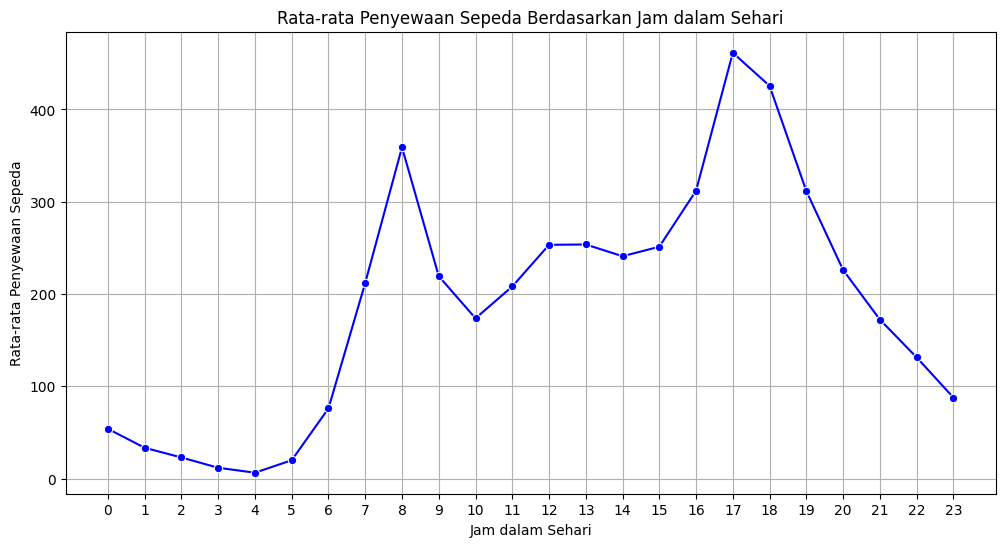

In [10]:
# Calculate the average bike rentals per hour
avg_rent_by_hour = hour_df.groupby('hr')['cnt'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rent_by_hour.index, y=avg_rent_by_hour.values, marker="o", color="b")
plt.xticks(range(0, 24))
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Rata-rata Penyewaan Sepeda")
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Jam dalam Sehari")
plt.grid(True)
plt.show()

**Insight:**
- Penyewaan sepeda meningkat tajam pada pukul **07:00 - 09:00** (jam berangkat kerja) dan **17:00 - 19:00** (jam pulang kerja).


### **Pertanyaan 2** Analisis Pengaruh Cuaca terhadap Penyewaan Sepeda

<ipython-input-11-7b4b82690652>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")


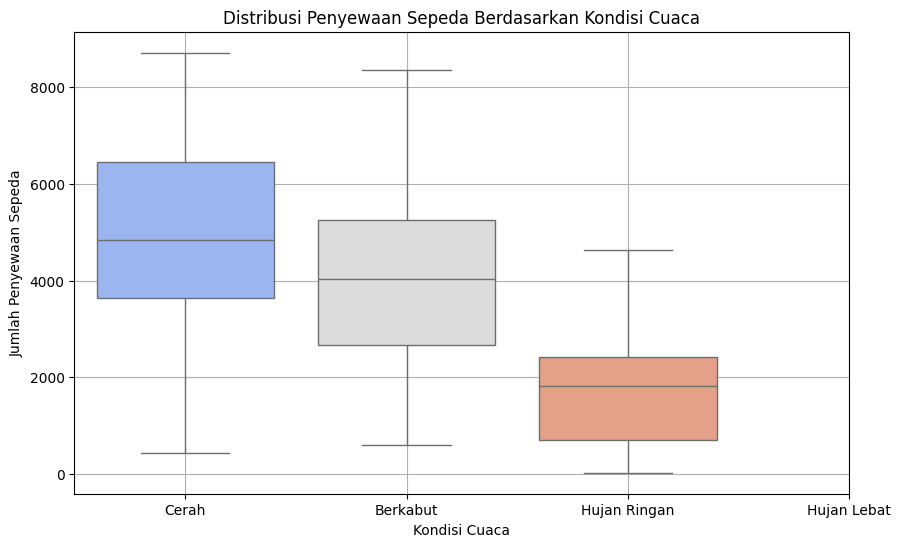

In [11]:
# Visualisasi hubungan antara cuaca dan jumlah penyewaan
plt.figure(figsize=(10, 6))
sns.boxplot(x="weathersit", y="cnt", data=day_df, palette="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Kondisi Cuaca")
plt.xticks(ticks=[0,1,2,3], labels=["Cerah", "Berkabut", "Hujan Ringan", "Hujan Lebat"])
plt.grid(True)
plt.show()

### **Pertanyaan 3** Analisis Pengaruh Musim terhadap Penyewaan Sepeda


<ipython-input-12-303d97713c37>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="season", y="cnt", data=day_df, palette="viridis")


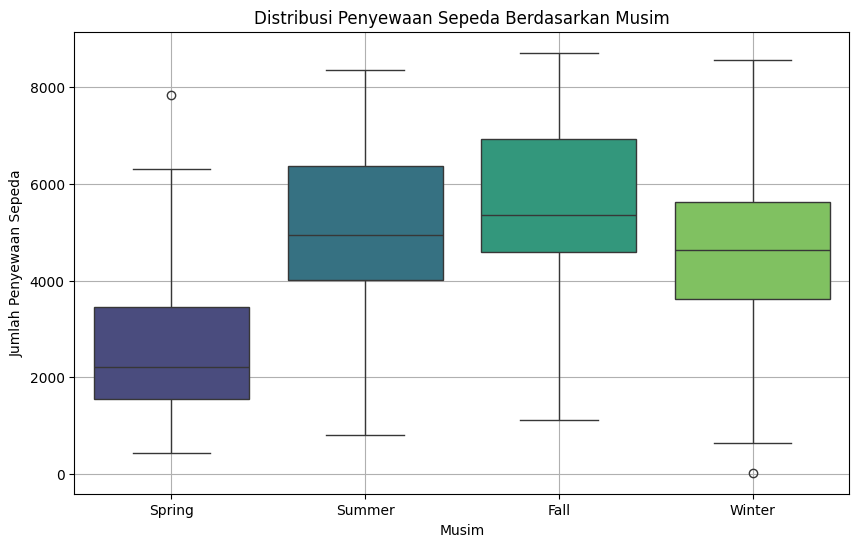

In [12]:
# Visualisasi jumlah penyewaan berdasarkan musim
plt.figure(figsize=(10, 6))
sns.boxplot(x="season", y="cnt", data=day_df, palette="viridis")
plt.xlabel("Musim")
plt.ylabel("Jumlah Penyewaan Sepeda")
plt.title("Distribusi Penyewaan Sepeda Berdasarkan Musim")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.grid(True)
plt.show()

## Analisis Lanjutan (Opsional)

### **Pertanyaan 1** RFM Analysis untuk Pola Penyewaan Sepeda

<ipython-input-15-93e2e26ff85e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=freq_by_weekday.index, y=freq_by_weekday.values, ax=ax[0], palette="coolwarm")
<ipython-input-15-93e2e26ff85e>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monetary.index, y=monetary.values, ax=ax[1], palette="viridis")


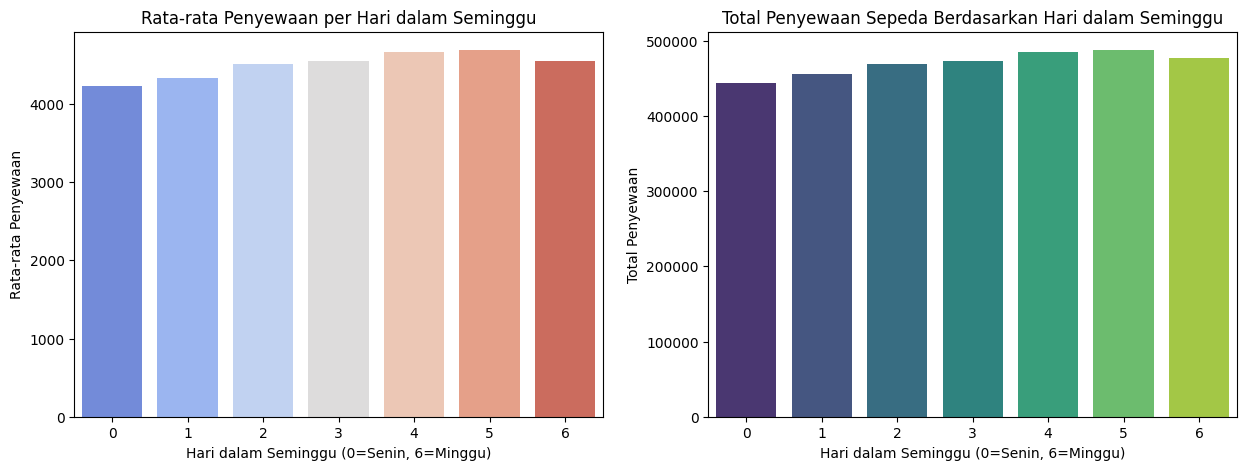

In [15]:
# Konversi tanggal
day_df["dteday"] = pd.to_datetime(day_df["dteday"])
latest_date = day_df["dteday"].max()

# Recency: Hari sejak terakhir kali penyewaan tinggi
day_df["recency"] = (latest_date - day_df["dteday"]).dt.days

# Frequency: Rata-rata penyewaan per hari dalam seminggu
freq_by_weekday = day_df.groupby("weekday")["cnt"].mean()

# Monetary: Total penyewaan berdasarkan hari dalam seminggu
monetary = day_df.groupby("weekday")["cnt"].sum()

# Visualisasi Frequency dan Monetary
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.barplot(x=freq_by_weekday.index, y=freq_by_weekday.values, ax=ax[0], palette="coolwarm")
ax[0].set_title("Rata-rata Penyewaan per Hari dalam Seminggu")
ax[0].set_xlabel("Hari dalam Seminggu (0=Senin, 6=Minggu)")
ax[0].set_ylabel("Rata-rata Penyewaan")

sns.barplot(x=monetary.index, y=monetary.values, ax=ax[1], palette="viridis")
ax[1].set_title("Total Penyewaan Sepeda Berdasarkan Hari dalam Seminggu")
ax[1].set_xlabel("Hari dalam Seminggu (0=Senin, 6=Minggu)")
ax[1].set_ylabel("Total Penyewaan")

plt.show()


### **Pertanyaan 2** Clustering (Binning) Berdasarkan Jumlah Penyewaan

<ipython-input-16-7934706848d5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=day_df["rent_category"], palette="pastel")


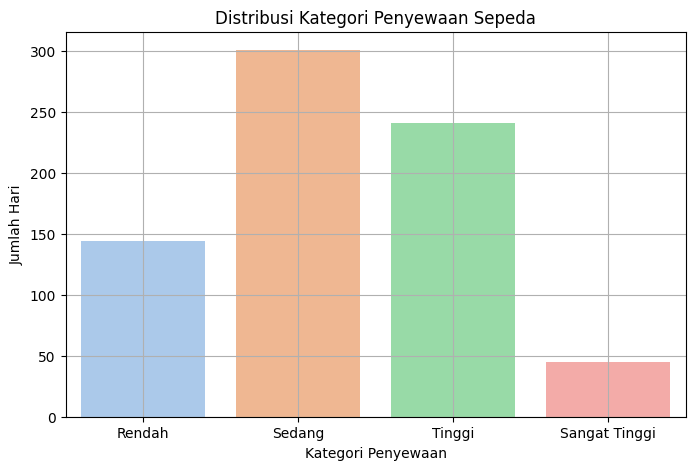

In [16]:
# Menentukan kategori jumlah penyewaan
bins = [0, 2500, 5000, 7500, 10000]
labels = ["Rendah", "Sedang", "Tinggi", "Sangat Tinggi"]
day_df["rent_category"] = pd.cut(day_df["cnt"], bins=bins, labels=labels)

# Visualisasi jumlah hari dalam setiap kategori
plt.figure(figsize=(8, 5))
sns.countplot(x=day_df["rent_category"], palette="pastel")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Hari")
plt.title("Distribusi Kategori Penyewaan Sepeda")
plt.grid(True)
plt.show()


## Conclusion

- Waktu puncak penyewaan terjadi pagi (07:00 - 09:00) dan sore (17:00 - 19:00).
- Penyewaan tertinggi saat cuaca cerah, dan menurun saat hujan.
- Musim gugur memiliki penyewaan tertinggi, sedangkan musim semi dan dingin terendah.
- RFM Analysis menunjukkan pola penyewaan tinggi di akhir pekan.
- Clustering membagi hari ke dalam kategori penyewaan rendah, sedang, tinggi, dan sangat tinggi.
